In [1]:
# setup
import os
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
# local utils
# !find . -name \*.pyc -delete
from vis_utils import *
from model_def import *
from model_train import *

%matplotlib inline


expName = 'cifar-MLP_v6.0.5' # MLP - w1:500, w2:100
batchSize = 100

# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)

Files already downloaded and verified
Files already downloaded and verified
 deer 	 ship 	 ship 	 bird


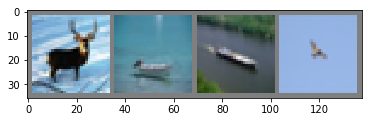

In [2]:
# setup and load CIFAR dataset
trainloader, testloader, classes = setup_cifar_data_mlp(batchSize)

# Check some random images to confirm the flattening and reshaping of images is correct
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images[0:4]
labels = labels[0:4]
images = images.view(4, 3, 32, 32) # reshape flattened images to 3x32x32

imshow(torchvision.utils.make_grid(images))
print(' \t'.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
# create a fully-connected network with ReLU non-linearities
net = MLP(input_dim=3072, fc1_dim=500, fc2_dim=100)
net._init_weights(init_sigma=0.003) # init using Gaussians 
print(net)  # dispay the network architecture

> /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/model_def.py(79)_init_weights()
-> if isinstance(m, nn.Conv2d):
(Pdb) c
MLP (
  (fc1): Linear (3072 -> 500)
  (fc2): Linear (500 -> 100)
  (fc3): Linear (100 -> 10)
)


In [5]:
# Train the network

from torch.optim.lr_scheduler import StepLR
import json

# hyper-params
useGpu = True
seed = 0  # for repeatable results
modelPath = []
numEpochs = 50
learningRate = 0.03
numBatchesPerEpoch = len(trainloader.dataset) // batchSize 
momentum = 0.9
weight_decay = 0.018 # pretty high L2-regularization (smaller generalization gap, smoother-looking filters)
gamma = 0.9 # decrement learning rate by this factor at every epoch
verboseFrequency = 50


# save training config
cfg = {'useGpu': useGpu, 'numEpochs': numEpochs, 'learningRate': learningRate, \
       'batchSize': batchSize, 'momentum': momentum, 'weight_decay': weight_decay, \
       'gamma': gamma, 'verboseFrequency': verboseFrequency, 'doVisFilter': False}


# set random seed
torch.default_generator.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Define a Loss function and optimizer settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learningRate, momentum=momentum, weight_decay=weight_decay)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, 1, gamma=gamma)

if not os.path.isfile(os.path.join(expDir, 'net-trained.dat')):
    # cfg = json.load(file(os.path.join(expDir,'train_config.json'), 'r'))
    with open(os.path.join(expDir,'train_config.json'), 'w') as config_file :
        json.dump(cfg, config_file, indent=4, separators=(',', ': '), sort_keys=True)
    
    # Train the network
    train_cifar_net(net, trainloader, testloader, criterion, (optimizer,lr_scheduler), \
                    expDir, batchSize=batchSize, \
                    numEpochs=numEpochs, useGpu=useGpu, fixFilterList=[], \
                    verboseFrequency=verboseFrequency, \
                    doVisFilter=False)

    # Save the network
    #    to be loaded as:
    #       net = Net()
    #       net.load_state_dict(torch.load(PATH))
    torch.save(net.state_dict(), os.path.join(expDir, 'net-trained.dat'))
else:
    print 'Loading network state dict from file.'
    net.load_state_dict(torch.load(os.path.join(expDir, 'net-trained.dat')))
    print 'Done.'

    


  0%|          | 0/50 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 2.303 accu: 0.099 lr: 0.030000
epoch:   0 batch:   100 loss: 2.303 accu: 0.096 lr: 0.030000
epoch:   0 batch:   150 loss: 2.303 accu: 0.108 lr: 0.030000
epoch:   0 batch:   200 loss: 2.282 accu: 0.131 lr: 0.030000
epoch:   0 batch:   250 loss: 2.132 accu: 0.172 lr: 0.030000
epoch:   0 batch:   300 loss: 2.058 accu: 0.187 lr: 0.030000
epoch:   0 batch:   350 loss: 2.022 accu: 0.233 lr: 0.030000
epoch:   0 batch:   400 loss: 1.938 accu: 0.282 lr: 0.030000
epoch:   0 batch:   450 loss: 1.887 accu: 0.309 lr: 0.030000
epoch:   0 batch:   500 loss: 1.903 accu: 0.319 lr: 0.030000


  2%|▏         | 1/50 [00:11<09:46, 11.97s/it]

epoch:   1 batch:    50 loss: 1.834 accu: 0.344 lr: 0.027000
epoch:   1 batch:   100 loss: 1.806 accu: 0.349 lr: 0.027000
epoch:   1 batch:   150 loss: 1.787 accu: 0.362 lr: 0.027000
epoch:   1 batch:   200 loss: 1.746 accu: 0.383 lr: 0.027000
epoch:   1 batch:   250 loss: 1.754 accu: 0.383 lr: 0.027000
epoch:   1 batch:   300 loss: 1.752 accu: 0.385 lr: 0.027000
epoch:   1 batch:   350 loss: 1.705 accu: 0.398 lr: 0.027000
epoch:   1 batch:   400 loss: 1.690 accu: 0.407 lr: 0.027000
epoch:   1 batch:   450 loss: 1.687 accu: 0.415 lr: 0.027000
epoch:   1 batch:   500 loss: 1.693 accu: 0.405 lr: 0.027000


  4%|▍         | 2/50 [00:23<09:28, 11.84s/it]

epoch:   2 batch:    50 loss: 1.668 accu: 0.418 lr: 0.024300
epoch:   2 batch:   100 loss: 1.641 accu: 0.427 lr: 0.024300
epoch:   2 batch:   150 loss: 1.670 accu: 0.416 lr: 0.024300
epoch:   2 batch:   200 loss: 1.658 accu: 0.421 lr: 0.024300
epoch:   2 batch:   250 loss: 1.649 accu: 0.418 lr: 0.024300
epoch:   2 batch:   300 loss: 1.653 accu: 0.418 lr: 0.024300
epoch:   2 batch:   350 loss: 1.641 accu: 0.417 lr: 0.024300
epoch:   2 batch:   400 loss: 1.631 accu: 0.433 lr: 0.024300
epoch:   2 batch:   450 loss: 1.633 accu: 0.428 lr: 0.024300
epoch:   2 batch:   500 loss: 1.645 accu: 0.429 lr: 0.024300


  6%|▌         | 3/50 [00:35<09:20, 11.92s/it]

epoch:   3 batch:    50 loss: 1.605 accu: 0.442 lr: 0.021870
epoch:   3 batch:   100 loss: 1.598 accu: 0.436 lr: 0.021870
epoch:   3 batch:   150 loss: 1.630 accu: 0.445 lr: 0.021870
epoch:   3 batch:   200 loss: 1.589 accu: 0.452 lr: 0.021870
epoch:   3 batch:   250 loss: 1.598 accu: 0.448 lr: 0.021870
epoch:   3 batch:   300 loss: 1.617 accu: 0.448 lr: 0.021870
epoch:   3 batch:   350 loss: 1.605 accu: 0.455 lr: 0.021870
epoch:   3 batch:   400 loss: 1.597 accu: 0.452 lr: 0.021870
epoch:   3 batch:   450 loss: 1.605 accu: 0.452 lr: 0.021870
epoch:   3 batch:   500 loss: 1.597 accu: 0.455 lr: 0.021870


  8%|▊         | 4/50 [00:47<09:10, 11.97s/it]

epoch:   4 batch:    50 loss: 1.574 accu: 0.470 lr: 0.019683
epoch:   4 batch:   100 loss: 1.575 accu: 0.456 lr: 0.019683
epoch:   4 batch:   150 loss: 1.576 accu: 0.454 lr: 0.019683
epoch:   4 batch:   200 loss: 1.612 accu: 0.446 lr: 0.019683
epoch:   4 batch:   250 loss: 1.601 accu: 0.444 lr: 0.019683
epoch:   4 batch:   300 loss: 1.572 accu: 0.466 lr: 0.019683
epoch:   4 batch:   350 loss: 1.577 accu: 0.451 lr: 0.019683
epoch:   4 batch:   400 loss: 1.568 accu: 0.462 lr: 0.019683
epoch:   4 batch:   450 loss: 1.567 accu: 0.461 lr: 0.019683
epoch:   4 batch:   500 loss: 1.560 accu: 0.465 lr: 0.019683


 10%|█         | 5/50 [00:59<09:00, 12.01s/it]

epoch:   5 batch:    50 loss: 1.558 accu: 0.468 lr: 0.017715
epoch:   5 batch:   100 loss: 1.539 accu: 0.465 lr: 0.017715
epoch:   5 batch:   150 loss: 1.530 accu: 0.470 lr: 0.017715
epoch:   5 batch:   200 loss: 1.547 accu: 0.468 lr: 0.017715
epoch:   5 batch:   250 loss: 1.533 accu: 0.468 lr: 0.017715
epoch:   5 batch:   300 loss: 1.563 accu: 0.469 lr: 0.017715
epoch:   5 batch:   350 loss: 1.584 accu: 0.447 lr: 0.017715
epoch:   5 batch:   400 loss: 1.546 accu: 0.464 lr: 0.017715
epoch:   5 batch:   450 loss: 1.568 accu: 0.461 lr: 0.017715
epoch:   5 batch:   500 loss: 1.566 accu: 0.470 lr: 0.017715


 12%|█▏        | 6/50 [01:12<08:55, 12.16s/it]

epoch:   6 batch:    50 loss: 1.550 accu: 0.467 lr: 0.015943
epoch:   6 batch:   100 loss: 1.527 accu: 0.474 lr: 0.015943
epoch:   6 batch:   150 loss: 1.519 accu: 0.486 lr: 0.015943
epoch:   6 batch:   200 loss: 1.558 accu: 0.462 lr: 0.015943
epoch:   6 batch:   250 loss: 1.545 accu: 0.468 lr: 0.015943
epoch:   6 batch:   300 loss: 1.541 accu: 0.464 lr: 0.015943
epoch:   6 batch:   350 loss: 1.563 accu: 0.458 lr: 0.015943
epoch:   6 batch:   400 loss: 1.520 accu: 0.474 lr: 0.015943
epoch:   6 batch:   450 loss: 1.524 accu: 0.486 lr: 0.015943
epoch:   6 batch:   500 loss: 1.535 accu: 0.470 lr: 0.015943


 14%|█▍        | 7/50 [01:26<09:12, 12.84s/it]

epoch:   7 batch:    50 loss: 1.518 accu: 0.474 lr: 0.014349
epoch:   7 batch:   100 loss: 1.490 accu: 0.489 lr: 0.014349
epoch:   7 batch:   150 loss: 1.507 accu: 0.478 lr: 0.014349
epoch:   7 batch:   200 loss: 1.535 accu: 0.469 lr: 0.014349
epoch:   7 batch:   250 loss: 1.535 accu: 0.477 lr: 0.014349
epoch:   7 batch:   300 loss: 1.536 accu: 0.477 lr: 0.014349
epoch:   7 batch:   350 loss: 1.500 accu: 0.492 lr: 0.014349
epoch:   7 batch:   400 loss: 1.533 accu: 0.483 lr: 0.014349
epoch:   7 batch:   450 loss: 1.545 accu: 0.473 lr: 0.014349
epoch:   7 batch:   500 loss: 1.535 accu: 0.475 lr: 0.014349


 16%|█▌        | 8/50 [01:38<08:49, 12.62s/it]

epoch:   8 batch:    50 loss: 1.502 accu: 0.481 lr: 0.012914
epoch:   8 batch:   100 loss: 1.517 accu: 0.480 lr: 0.012914
epoch:   8 batch:   150 loss: 1.496 accu: 0.489 lr: 0.012914
epoch:   8 batch:   200 loss: 1.502 accu: 0.483 lr: 0.012914
epoch:   8 batch:   250 loss: 1.502 accu: 0.485 lr: 0.012914
epoch:   8 batch:   300 loss: 1.518 accu: 0.480 lr: 0.012914
epoch:   8 batch:   350 loss: 1.513 accu: 0.483 lr: 0.012914
epoch:   8 batch:   400 loss: 1.484 accu: 0.494 lr: 0.012914
epoch:   8 batch:   450 loss: 1.521 accu: 0.475 lr: 0.012914
epoch:   8 batch:   500 loss: 1.522 accu: 0.476 lr: 0.012914


 18%|█▊        | 9/50 [01:52<08:52, 13.00s/it]

epoch:   9 batch:    50 loss: 1.453 accu: 0.506 lr: 0.011623
epoch:   9 batch:   100 loss: 1.473 accu: 0.490 lr: 0.011623
epoch:   9 batch:   150 loss: 1.466 accu: 0.494 lr: 0.011623
epoch:   9 batch:   200 loss: 1.496 accu: 0.488 lr: 0.011623
epoch:   9 batch:   250 loss: 1.498 accu: 0.493 lr: 0.011623
epoch:   9 batch:   300 loss: 1.517 accu: 0.484 lr: 0.011623
epoch:   9 batch:   350 loss: 1.495 accu: 0.497 lr: 0.011623
epoch:   9 batch:   400 loss: 1.524 accu: 0.468 lr: 0.011623
epoch:   9 batch:   450 loss: 1.514 accu: 0.473 lr: 0.011623
epoch:   9 batch:   500 loss: 1.492 accu: 0.494 lr: 0.011623


 20%|██        | 10/50 [02:05<08:35, 12.89s/it]

epoch:  10 batch:    50 loss: 1.487 accu: 0.492 lr: 0.010460
epoch:  10 batch:   100 loss: 1.490 accu: 0.491 lr: 0.010460
epoch:  10 batch:   150 loss: 1.497 accu: 0.479 lr: 0.010460
epoch:  10 batch:   200 loss: 1.488 accu: 0.485 lr: 0.010460
epoch:  10 batch:   250 loss: 1.470 accu: 0.497 lr: 0.010460
epoch:  10 batch:   300 loss: 1.491 accu: 0.488 lr: 0.010460
epoch:  10 batch:   350 loss: 1.493 accu: 0.487 lr: 0.010460
epoch:  10 batch:   400 loss: 1.469 accu: 0.499 lr: 0.010460
epoch:  10 batch:   450 loss: 1.466 accu: 0.485 lr: 0.010460
epoch:  10 batch:   500 loss: 1.472 accu: 0.498 lr: 0.010460


 22%|██▏       | 11/50 [02:17<08:18, 12.78s/it]

epoch:  11 batch:    50 loss: 1.444 accu: 0.501 lr: 0.009414
epoch:  11 batch:   100 loss: 1.429 accu: 0.504 lr: 0.009414
epoch:  11 batch:   150 loss: 1.459 accu: 0.510 lr: 0.009414
epoch:  11 batch:   200 loss: 1.488 accu: 0.492 lr: 0.009414
epoch:  11 batch:   250 loss: 1.461 accu: 0.504 lr: 0.009414
epoch:  11 batch:   300 loss: 1.464 accu: 0.495 lr: 0.009414
epoch:  11 batch:   350 loss: 1.475 accu: 0.496 lr: 0.009414
epoch:  11 batch:   400 loss: 1.472 accu: 0.485 lr: 0.009414
epoch:  11 batch:   450 loss: 1.490 accu: 0.496 lr: 0.009414
epoch:  11 batch:   500 loss: 1.484 accu: 0.488 lr: 0.009414


 24%|██▍       | 12/50 [02:30<08:08, 12.85s/it]

epoch:  12 batch:    50 loss: 1.434 accu: 0.510 lr: 0.008473
epoch:  12 batch:   100 loss: 1.439 accu: 0.507 lr: 0.008473
epoch:  12 batch:   150 loss: 1.448 accu: 0.495 lr: 0.008473
epoch:  12 batch:   200 loss: 1.486 accu: 0.498 lr: 0.008473
epoch:  12 batch:   250 loss: 1.469 accu: 0.505 lr: 0.008473
epoch:  12 batch:   300 loss: 1.464 accu: 0.499 lr: 0.008473
epoch:  12 batch:   350 loss: 1.449 accu: 0.504 lr: 0.008473
epoch:  12 batch:   400 loss: 1.458 accu: 0.497 lr: 0.008473
epoch:  12 batch:   450 loss: 1.470 accu: 0.491 lr: 0.008473
epoch:  12 batch:   500 loss: 1.461 accu: 0.500 lr: 0.008473


 26%|██▌       | 13/50 [02:43<07:49, 12.70s/it]

epoch:  13 batch:    50 loss: 1.409 accu: 0.521 lr: 0.007626
epoch:  13 batch:   100 loss: 1.451 accu: 0.508 lr: 0.007626
epoch:  13 batch:   150 loss: 1.434 accu: 0.506 lr: 0.007626
epoch:  13 batch:   200 loss: 1.447 accu: 0.498 lr: 0.007626
epoch:  13 batch:   250 loss: 1.449 accu: 0.502 lr: 0.007626
epoch:  13 batch:   300 loss: 1.459 accu: 0.504 lr: 0.007626
epoch:  13 batch:   350 loss: 1.437 accu: 0.511 lr: 0.007626
epoch:  13 batch:   400 loss: 1.462 accu: 0.497 lr: 0.007626
epoch:  13 batch:   450 loss: 1.444 accu: 0.506 lr: 0.007626
epoch:  13 batch:   500 loss: 1.474 accu: 0.491 lr: 0.007626


 28%|██▊       | 14/50 [02:56<07:43, 12.88s/it]

epoch:  14 batch:    50 loss: 1.429 accu: 0.514 lr: 0.006863
epoch:  14 batch:   100 loss: 1.405 accu: 0.527 lr: 0.006863
epoch:  14 batch:   150 loss: 1.389 accu: 0.519 lr: 0.006863
epoch:  14 batch:   200 loss: 1.422 accu: 0.513 lr: 0.006863
epoch:  14 batch:   250 loss: 1.440 accu: 0.500 lr: 0.006863
epoch:  14 batch:   300 loss: 1.445 accu: 0.511 lr: 0.006863
epoch:  14 batch:   350 loss: 1.452 accu: 0.500 lr: 0.006863
epoch:  14 batch:   400 loss: 1.440 accu: 0.505 lr: 0.006863
epoch:  14 batch:   450 loss: 1.450 accu: 0.500 lr: 0.006863
epoch:  14 batch:   500 loss: 1.469 accu: 0.495 lr: 0.006863


 30%|███       | 15/50 [03:10<07:43, 13.25s/it]

epoch:  15 batch:    50 loss: 1.408 accu: 0.525 lr: 0.006177
epoch:  15 batch:   100 loss: 1.413 accu: 0.512 lr: 0.006177
epoch:  15 batch:   150 loss: 1.435 accu: 0.506 lr: 0.006177
epoch:  15 batch:   200 loss: 1.408 accu: 0.526 lr: 0.006177
epoch:  15 batch:   250 loss: 1.443 accu: 0.509 lr: 0.006177
epoch:  15 batch:   300 loss: 1.431 accu: 0.504 lr: 0.006177
epoch:  15 batch:   350 loss: 1.439 accu: 0.508 lr: 0.006177
epoch:  15 batch:   400 loss: 1.441 accu: 0.503 lr: 0.006177
epoch:  15 batch:   450 loss: 1.424 accu: 0.512 lr: 0.006177
epoch:  15 batch:   500 loss: 1.444 accu: 0.503 lr: 0.006177


 32%|███▏      | 16/50 [03:22<07:15, 12.82s/it]

epoch:  16 batch:    50 loss: 1.385 accu: 0.522 lr: 0.005559
epoch:  16 batch:   100 loss: 1.407 accu: 0.519 lr: 0.005559
epoch:  16 batch:   150 loss: 1.414 accu: 0.514 lr: 0.005559
epoch:  16 batch:   200 loss: 1.404 accu: 0.516 lr: 0.005559
epoch:  16 batch:   250 loss: 1.410 accu: 0.514 lr: 0.005559
epoch:  16 batch:   300 loss: 1.415 accu: 0.516 lr: 0.005559
epoch:  16 batch:   350 loss: 1.428 accu: 0.512 lr: 0.005559
epoch:  16 batch:   400 loss: 1.426 accu: 0.505 lr: 0.005559
epoch:  16 batch:   450 loss: 1.424 accu: 0.510 lr: 0.005559
epoch:  16 batch:   500 loss: 1.419 accu: 0.514 lr: 0.005559


 34%|███▍      | 17/50 [03:36<07:13, 13.12s/it]

epoch:  17 batch:    50 loss: 1.373 accu: 0.527 lr: 0.005003
epoch:  17 batch:   100 loss: 1.389 accu: 0.532 lr: 0.005003
epoch:  17 batch:   150 loss: 1.376 accu: 0.524 lr: 0.005003
epoch:  17 batch:   200 loss: 1.409 accu: 0.521 lr: 0.005003
epoch:  17 batch:   250 loss: 1.403 accu: 0.522 lr: 0.005003
epoch:  17 batch:   300 loss: 1.416 accu: 0.520 lr: 0.005003
epoch:  17 batch:   350 loss: 1.423 accu: 0.513 lr: 0.005003
epoch:  17 batch:   400 loss: 1.407 accu: 0.513 lr: 0.005003
epoch:  17 batch:   450 loss: 1.421 accu: 0.515 lr: 0.005003
epoch:  17 batch:   500 loss: 1.414 accu: 0.519 lr: 0.005003


 36%|███▌      | 18/50 [03:48<06:51, 12.86s/it]

epoch:  18 batch:    50 loss: 1.386 accu: 0.527 lr: 0.004503
epoch:  18 batch:   100 loss: 1.396 accu: 0.520 lr: 0.004503
epoch:  18 batch:   150 loss: 1.369 accu: 0.530 lr: 0.004503
epoch:  18 batch:   200 loss: 1.398 accu: 0.512 lr: 0.004503
epoch:  18 batch:   250 loss: 1.396 accu: 0.526 lr: 0.004503
epoch:  18 batch:   300 loss: 1.406 accu: 0.520 lr: 0.004503
epoch:  18 batch:   350 loss: 1.394 accu: 0.522 lr: 0.004503
epoch:  18 batch:   400 loss: 1.412 accu: 0.512 lr: 0.004503
epoch:  18 batch:   450 loss: 1.403 accu: 0.520 lr: 0.004503
epoch:  18 batch:   500 loss: 1.409 accu: 0.509 lr: 0.004503


 38%|███▊      | 19/50 [04:01<06:37, 12.83s/it]

epoch:  19 batch:    50 loss: 1.372 accu: 0.530 lr: 0.004053
epoch:  19 batch:   100 loss: 1.400 accu: 0.522 lr: 0.004053
epoch:  19 batch:   150 loss: 1.360 accu: 0.537 lr: 0.004053
epoch:  19 batch:   200 loss: 1.397 accu: 0.522 lr: 0.004053
epoch:  19 batch:   250 loss: 1.381 accu: 0.530 lr: 0.004053
epoch:  19 batch:   300 loss: 1.387 accu: 0.527 lr: 0.004053
epoch:  19 batch:   350 loss: 1.373 accu: 0.520 lr: 0.004053
epoch:  19 batch:   400 loss: 1.392 accu: 0.518 lr: 0.004053
epoch:  19 batch:   450 loss: 1.402 accu: 0.515 lr: 0.004053
epoch:  19 batch:   500 loss: 1.390 accu: 0.524 lr: 0.004053


 40%|████      | 20/50 [04:15<06:35, 13.18s/it]

epoch:  20 batch:    50 loss: 1.361 accu: 0.538 lr: 0.003647
epoch:  20 batch:   100 loss: 1.368 accu: 0.539 lr: 0.003647
epoch:  20 batch:   150 loss: 1.354 accu: 0.546 lr: 0.003647
epoch:  20 batch:   200 loss: 1.374 accu: 0.530 lr: 0.003647
epoch:  20 batch:   250 loss: 1.368 accu: 0.538 lr: 0.003647
epoch:  20 batch:   300 loss: 1.362 accu: 0.529 lr: 0.003647
epoch:  20 batch:   350 loss: 1.387 accu: 0.523 lr: 0.003647
epoch:  20 batch:   400 loss: 1.413 accu: 0.512 lr: 0.003647
epoch:  20 batch:   450 loss: 1.401 accu: 0.517 lr: 0.003647
epoch:  20 batch:   500 loss: 1.399 accu: 0.521 lr: 0.003647


 42%|████▏     | 21/50 [04:26<06:06, 12.62s/it]

epoch:  21 batch:    50 loss: 1.362 accu: 0.533 lr: 0.003283
epoch:  21 batch:   100 loss: 1.363 accu: 0.536 lr: 0.003283
epoch:  21 batch:   150 loss: 1.344 accu: 0.542 lr: 0.003283
epoch:  21 batch:   200 loss: 1.373 accu: 0.540 lr: 0.003283
epoch:  21 batch:   250 loss: 1.365 accu: 0.531 lr: 0.003283
epoch:  21 batch:   300 loss: 1.372 accu: 0.520 lr: 0.003283
epoch:  21 batch:   350 loss: 1.372 accu: 0.526 lr: 0.003283
epoch:  21 batch:   400 loss: 1.376 accu: 0.537 lr: 0.003283
epoch:  21 batch:   450 loss: 1.396 accu: 0.517 lr: 0.003283
epoch:  21 batch:   500 loss: 1.393 accu: 0.521 lr: 0.003283


 44%|████▍     | 22/50 [04:38<05:47, 12.41s/it]

epoch:  22 batch:    50 loss: 1.352 accu: 0.543 lr: 0.002954
epoch:  22 batch:   100 loss: 1.337 accu: 0.553 lr: 0.002954
epoch:  22 batch:   150 loss: 1.375 accu: 0.531 lr: 0.002954
epoch:  22 batch:   200 loss: 1.360 accu: 0.542 lr: 0.002954
epoch:  22 batch:   250 loss: 1.360 accu: 0.522 lr: 0.002954
epoch:  22 batch:   300 loss: 1.371 accu: 0.526 lr: 0.002954
epoch:  22 batch:   350 loss: 1.374 accu: 0.535 lr: 0.002954
epoch:  22 batch:   400 loss: 1.350 accu: 0.537 lr: 0.002954
epoch:  22 batch:   450 loss: 1.389 accu: 0.526 lr: 0.002954
epoch:  22 batch:   500 loss: 1.377 accu: 0.519 lr: 0.002954


 46%|████▌     | 23/50 [04:52<05:43, 12.73s/it]

epoch:  23 batch:    50 loss: 1.357 accu: 0.533 lr: 0.002659
epoch:  23 batch:   100 loss: 1.351 accu: 0.543 lr: 0.002659
epoch:  23 batch:   150 loss: 1.346 accu: 0.539 lr: 0.002659
epoch:  23 batch:   200 loss: 1.368 accu: 0.535 lr: 0.002659
epoch:  23 batch:   250 loss: 1.348 accu: 0.538 lr: 0.002659
epoch:  23 batch:   300 loss: 1.358 accu: 0.549 lr: 0.002659
epoch:  23 batch:   350 loss: 1.349 accu: 0.543 lr: 0.002659
epoch:  23 batch:   400 loss: 1.357 accu: 0.533 lr: 0.002659
epoch:  23 batch:   450 loss: 1.365 accu: 0.536 lr: 0.002659
epoch:  23 batch:   500 loss: 1.375 accu: 0.523 lr: 0.002659


 48%|████▊     | 24/50 [05:06<05:41, 13.12s/it]

epoch:  24 batch:    50 loss: 1.348 accu: 0.541 lr: 0.002393
epoch:  24 batch:   100 loss: 1.344 accu: 0.550 lr: 0.002393
epoch:  24 batch:   150 loss: 1.336 accu: 0.543 lr: 0.002393
epoch:  24 batch:   200 loss: 1.362 accu: 0.534 lr: 0.002393
epoch:  24 batch:   250 loss: 1.335 accu: 0.538 lr: 0.002393
epoch:  24 batch:   300 loss: 1.344 accu: 0.541 lr: 0.002393
epoch:  24 batch:   350 loss: 1.342 accu: 0.537 lr: 0.002393
epoch:  24 batch:   400 loss: 1.359 accu: 0.534 lr: 0.002393
epoch:  24 batch:   450 loss: 1.362 accu: 0.539 lr: 0.002393
epoch:  24 batch:   500 loss: 1.366 accu: 0.536 lr: 0.002393


 50%|█████     | 25/50 [05:17<05:17, 12.71s/it]

epoch:  25 batch:    50 loss: 1.343 accu: 0.542 lr: 0.002154
epoch:  25 batch:   100 loss: 1.328 accu: 0.560 lr: 0.002154
epoch:  25 batch:   150 loss: 1.349 accu: 0.543 lr: 0.002154
epoch:  25 batch:   200 loss: 1.347 accu: 0.532 lr: 0.002154
epoch:  25 batch:   250 loss: 1.353 accu: 0.530 lr: 0.002154
epoch:  25 batch:   300 loss: 1.345 accu: 0.536 lr: 0.002154
epoch:  25 batch:   350 loss: 1.352 accu: 0.544 lr: 0.002154
epoch:  25 batch:   400 loss: 1.331 accu: 0.549 lr: 0.002154
epoch:  25 batch:   450 loss: 1.351 accu: 0.527 lr: 0.002154
epoch:  25 batch:   500 loss: 1.340 accu: 0.542 lr: 0.002154


 52%|█████▏    | 26/50 [05:30<05:05, 12.73s/it]

epoch:  26 batch:    50 loss: 1.327 accu: 0.549 lr: 0.001938
epoch:  26 batch:   100 loss: 1.325 accu: 0.547 lr: 0.001938
epoch:  26 batch:   150 loss: 1.336 accu: 0.548 lr: 0.001938
epoch:  26 batch:   200 loss: 1.323 accu: 0.547 lr: 0.001938
epoch:  26 batch:   250 loss: 1.344 accu: 0.549 lr: 0.001938
epoch:  26 batch:   300 loss: 1.338 accu: 0.535 lr: 0.001938
epoch:  26 batch:   350 loss: 1.366 accu: 0.534 lr: 0.001938
epoch:  26 batch:   400 loss: 1.321 accu: 0.544 lr: 0.001938
epoch:  26 batch:   450 loss: 1.352 accu: 0.538 lr: 0.001938
epoch:  26 batch:   500 loss: 1.353 accu: 0.529 lr: 0.001938


 54%|█████▍    | 27/50 [05:44<04:57, 12.95s/it]

epoch:  27 batch:    50 loss: 1.315 accu: 0.542 lr: 0.001744
epoch:  27 batch:   100 loss: 1.340 accu: 0.534 lr: 0.001744
epoch:  27 batch:   150 loss: 1.333 accu: 0.546 lr: 0.001744
epoch:  27 batch:   200 loss: 1.322 accu: 0.555 lr: 0.001744
epoch:  27 batch:   250 loss: 1.325 accu: 0.543 lr: 0.001744
epoch:  27 batch:   300 loss: 1.328 accu: 0.547 lr: 0.001744
epoch:  27 batch:   350 loss: 1.322 accu: 0.553 lr: 0.001744
epoch:  27 batch:   400 loss: 1.361 accu: 0.533 lr: 0.001744
epoch:  27 batch:   450 loss: 1.349 accu: 0.535 lr: 0.001744
epoch:  27 batch:   500 loss: 1.338 accu: 0.537 lr: 0.001744


 56%|█████▌    | 28/50 [05:55<04:38, 12.64s/it]

epoch:  28 batch:    50 loss: 1.328 accu: 0.550 lr: 0.001570
epoch:  28 batch:   100 loss: 1.336 accu: 0.544 lr: 0.001570
epoch:  28 batch:   150 loss: 1.316 accu: 0.549 lr: 0.001570
epoch:  28 batch:   200 loss: 1.332 accu: 0.544 lr: 0.001570
epoch:  28 batch:   250 loss: 1.307 accu: 0.556 lr: 0.001570
epoch:  28 batch:   300 loss: 1.349 accu: 0.545 lr: 0.001570
epoch:  28 batch:   350 loss: 1.332 accu: 0.550 lr: 0.001570
epoch:  28 batch:   400 loss: 1.349 accu: 0.538 lr: 0.001570
epoch:  28 batch:   450 loss: 1.315 accu: 0.543 lr: 0.001570
epoch:  28 batch:   500 loss: 1.327 accu: 0.541 lr: 0.001570


 58%|█████▊    | 29/50 [06:08<04:26, 12.69s/it]

epoch:  29 batch:    50 loss: 1.327 accu: 0.549 lr: 0.001413
epoch:  29 batch:   100 loss: 1.327 accu: 0.546 lr: 0.001413
epoch:  29 batch:   150 loss: 1.317 accu: 0.549 lr: 0.001413
epoch:  29 batch:   200 loss: 1.310 accu: 0.546 lr: 0.001413
epoch:  29 batch:   250 loss: 1.319 accu: 0.553 lr: 0.001413
epoch:  29 batch:   300 loss: 1.315 accu: 0.548 lr: 0.001413
epoch:  29 batch:   350 loss: 1.323 accu: 0.544 lr: 0.001413
epoch:  29 batch:   400 loss: 1.338 accu: 0.548 lr: 0.001413
epoch:  29 batch:   450 loss: 1.331 accu: 0.549 lr: 0.001413
epoch:  29 batch:   500 loss: 1.328 accu: 0.543 lr: 0.001413


 60%|██████    | 30/50 [06:20<04:06, 12.35s/it]

epoch:  30 batch:    50 loss: 1.312 accu: 0.554 lr: 0.001272
epoch:  30 batch:   100 loss: 1.324 accu: 0.548 lr: 0.001272
epoch:  30 batch:   150 loss: 1.340 accu: 0.537 lr: 0.001272
epoch:  30 batch:   200 loss: 1.308 accu: 0.551 lr: 0.001272
epoch:  30 batch:   250 loss: 1.299 accu: 0.567 lr: 0.001272
epoch:  30 batch:   300 loss: 1.331 accu: 0.541 lr: 0.001272
epoch:  30 batch:   350 loss: 1.295 accu: 0.560 lr: 0.001272
epoch:  30 batch:   400 loss: 1.343 accu: 0.536 lr: 0.001272
epoch:  30 batch:   450 loss: 1.315 accu: 0.554 lr: 0.001272
epoch:  30 batch:   500 loss: 1.323 accu: 0.547 lr: 0.001272


 62%|██████▏   | 31/50 [06:31<03:50, 12.13s/it]

epoch:  31 batch:    50 loss: 1.313 accu: 0.548 lr: 0.001145
epoch:  31 batch:   100 loss: 1.311 accu: 0.547 lr: 0.001145
epoch:  31 batch:   150 loss: 1.324 accu: 0.545 lr: 0.001145
epoch:  31 batch:   200 loss: 1.310 accu: 0.544 lr: 0.001145
epoch:  31 batch:   250 loss: 1.302 accu: 0.561 lr: 0.001145
epoch:  31 batch:   300 loss: 1.302 accu: 0.554 lr: 0.001145
epoch:  31 batch:   350 loss: 1.320 accu: 0.556 lr: 0.001145
epoch:  31 batch:   400 loss: 1.316 accu: 0.549 lr: 0.001145
epoch:  31 batch:   450 loss: 1.330 accu: 0.538 lr: 0.001145
epoch:  31 batch:   500 loss: 1.325 accu: 0.547 lr: 0.001145


 64%|██████▍   | 32/50 [06:43<03:37, 12.07s/it]

epoch:  32 batch:    50 loss: 1.298 accu: 0.564 lr: 0.001030
epoch:  32 batch:   100 loss: 1.307 accu: 0.547 lr: 0.001030
epoch:  32 batch:   150 loss: 1.312 accu: 0.549 lr: 0.001030
epoch:  32 batch:   200 loss: 1.335 accu: 0.542 lr: 0.001030
epoch:  32 batch:   250 loss: 1.313 accu: 0.553 lr: 0.001030
epoch:  32 batch:   300 loss: 1.319 accu: 0.553 lr: 0.001030
epoch:  32 batch:   350 loss: 1.311 accu: 0.554 lr: 0.001030
epoch:  32 batch:   400 loss: 1.320 accu: 0.546 lr: 0.001030
epoch:  32 batch:   450 loss: 1.296 accu: 0.559 lr: 0.001030
epoch:  32 batch:   500 loss: 1.310 accu: 0.553 lr: 0.001030


 66%|██████▌   | 33/50 [06:55<03:25, 12.09s/it]

epoch:  33 batch:    50 loss: 1.293 accu: 0.562 lr: 0.000927
epoch:  33 batch:   100 loss: 1.302 accu: 0.556 lr: 0.000927
epoch:  33 batch:   150 loss: 1.302 accu: 0.555 lr: 0.000927
epoch:  33 batch:   200 loss: 1.297 accu: 0.560 lr: 0.000927
epoch:  33 batch:   250 loss: 1.332 accu: 0.555 lr: 0.000927
epoch:  33 batch:   300 loss: 1.298 accu: 0.554 lr: 0.000927
epoch:  33 batch:   350 loss: 1.317 accu: 0.547 lr: 0.000927
epoch:  33 batch:   400 loss: 1.325 accu: 0.536 lr: 0.000927
epoch:  33 batch:   450 loss: 1.308 accu: 0.548 lr: 0.000927
epoch:  33 batch:   500 loss: 1.305 accu: 0.552 lr: 0.000927


 68%|██████▊   | 34/50 [07:07<03:12, 12.04s/it]

epoch:  34 batch:    50 loss: 1.284 accu: 0.560 lr: 0.000834
epoch:  34 batch:   100 loss: 1.304 accu: 0.548 lr: 0.000834
epoch:  34 batch:   150 loss: 1.291 accu: 0.560 lr: 0.000834
epoch:  34 batch:   200 loss: 1.300 accu: 0.560 lr: 0.000834
epoch:  34 batch:   250 loss: 1.297 accu: 0.563 lr: 0.000834
epoch:  34 batch:   300 loss: 1.311 accu: 0.559 lr: 0.000834
epoch:  34 batch:   350 loss: 1.312 accu: 0.544 lr: 0.000834
epoch:  34 batch:   400 loss: 1.307 accu: 0.549 lr: 0.000834
epoch:  34 batch:   450 loss: 1.332 accu: 0.539 lr: 0.000834
epoch:  34 batch:   500 loss: 1.313 accu: 0.550 lr: 0.000834


 70%|███████   | 35/50 [07:21<03:06, 12.45s/it]

epoch:  35 batch:    50 loss: 1.289 accu: 0.558 lr: 0.000751
epoch:  35 batch:   100 loss: 1.321 accu: 0.546 lr: 0.000751
epoch:  35 batch:   150 loss: 1.281 accu: 0.572 lr: 0.000751
epoch:  35 batch:   200 loss: 1.308 accu: 0.556 lr: 0.000751
epoch:  35 batch:   250 loss: 1.311 accu: 0.552 lr: 0.000751
epoch:  35 batch:   300 loss: 1.303 accu: 0.556 lr: 0.000751
epoch:  35 batch:   350 loss: 1.304 accu: 0.551 lr: 0.000751
epoch:  35 batch:   400 loss: 1.318 accu: 0.546 lr: 0.000751
epoch:  35 batch:   450 loss: 1.294 accu: 0.557 lr: 0.000751
epoch:  35 batch:   500 loss: 1.302 accu: 0.548 lr: 0.000751


 72%|███████▏  | 36/50 [07:33<02:55, 12.51s/it]

epoch:  36 batch:    50 loss: 1.298 accu: 0.550 lr: 0.000676
epoch:  36 batch:   100 loss: 1.298 accu: 0.563 lr: 0.000676
epoch:  36 batch:   150 loss: 1.306 accu: 0.557 lr: 0.000676
epoch:  36 batch:   200 loss: 1.292 accu: 0.565 lr: 0.000676
epoch:  36 batch:   250 loss: 1.315 accu: 0.540 lr: 0.000676
epoch:  36 batch:   300 loss: 1.290 accu: 0.556 lr: 0.000676
epoch:  36 batch:   350 loss: 1.294 accu: 0.558 lr: 0.000676
epoch:  36 batch:   400 loss: 1.288 accu: 0.557 lr: 0.000676
epoch:  36 batch:   450 loss: 1.321 accu: 0.548 lr: 0.000676
epoch:  36 batch:   500 loss: 1.300 accu: 0.556 lr: 0.000676


 74%|███████▍  | 37/50 [07:46<02:42, 12.47s/it]

epoch:  37 batch:    50 loss: 1.296 accu: 0.559 lr: 0.000608
epoch:  37 batch:   100 loss: 1.299 accu: 0.550 lr: 0.000608
epoch:  37 batch:   150 loss: 1.277 accu: 0.561 lr: 0.000608
epoch:  37 batch:   200 loss: 1.292 accu: 0.554 lr: 0.000608
epoch:  37 batch:   250 loss: 1.300 accu: 0.556 lr: 0.000608
epoch:  37 batch:   300 loss: 1.319 accu: 0.546 lr: 0.000608
epoch:  37 batch:   350 loss: 1.297 accu: 0.549 lr: 0.000608
epoch:  37 batch:   400 loss: 1.291 accu: 0.560 lr: 0.000608
epoch:  37 batch:   450 loss: 1.306 accu: 0.553 lr: 0.000608
epoch:  37 batch:   500 loss: 1.297 accu: 0.563 lr: 0.000608


 76%|███████▌  | 38/50 [07:58<02:29, 12.42s/it]

epoch:  38 batch:    50 loss: 1.315 accu: 0.561 lr: 0.000547
epoch:  38 batch:   100 loss: 1.303 accu: 0.555 lr: 0.000547
epoch:  38 batch:   150 loss: 1.297 accu: 0.559 lr: 0.000547
epoch:  38 batch:   200 loss: 1.309 accu: 0.562 lr: 0.000547
epoch:  38 batch:   250 loss: 1.275 accu: 0.559 lr: 0.000547
epoch:  38 batch:   300 loss: 1.295 accu: 0.552 lr: 0.000547
epoch:  38 batch:   350 loss: 1.273 accu: 0.566 lr: 0.000547
epoch:  38 batch:   400 loss: 1.291 accu: 0.555 lr: 0.000547
epoch:  38 batch:   450 loss: 1.305 accu: 0.551 lr: 0.000547
epoch:  38 batch:   500 loss: 1.292 accu: 0.557 lr: 0.000547


 78%|███████▊  | 39/50 [08:10<02:13, 12.10s/it]

epoch:  39 batch:    50 loss: 1.285 accu: 0.564 lr: 0.000493
epoch:  39 batch:   100 loss: 1.298 accu: 0.555 lr: 0.000493
epoch:  39 batch:   150 loss: 1.281 accu: 0.562 lr: 0.000493
epoch:  39 batch:   200 loss: 1.294 accu: 0.555 lr: 0.000493
epoch:  39 batch:   250 loss: 1.287 accu: 0.560 lr: 0.000493
epoch:  39 batch:   300 loss: 1.296 accu: 0.552 lr: 0.000493
epoch:  39 batch:   350 loss: 1.305 accu: 0.560 lr: 0.000493
epoch:  39 batch:   400 loss: 1.288 accu: 0.558 lr: 0.000493
epoch:  39 batch:   450 loss: 1.284 accu: 0.562 lr: 0.000493
epoch:  39 batch:   500 loss: 1.315 accu: 0.550 lr: 0.000493


 80%|████████  | 40/50 [08:23<02:05, 12.59s/it]

epoch:  40 batch:    50 loss: 1.291 accu: 0.559 lr: 0.000443
epoch:  40 batch:   100 loss: 1.288 accu: 0.559 lr: 0.000443
epoch:  40 batch:   150 loss: 1.272 accu: 0.573 lr: 0.000443
epoch:  40 batch:   200 loss: 1.301 accu: 0.553 lr: 0.000443
epoch:  40 batch:   250 loss: 1.297 accu: 0.554 lr: 0.000443
epoch:  40 batch:   300 loss: 1.292 accu: 0.568 lr: 0.000443
epoch:  40 batch:   350 loss: 1.309 accu: 0.554 lr: 0.000443
epoch:  40 batch:   400 loss: 1.305 accu: 0.551 lr: 0.000443
epoch:  40 batch:   450 loss: 1.278 accu: 0.556 lr: 0.000443
epoch:  40 batch:   500 loss: 1.283 accu: 0.563 lr: 0.000443


 82%|████████▏ | 41/50 [08:36<01:52, 12.49s/it]

epoch:  41 batch:    50 loss: 1.306 accu: 0.550 lr: 0.000399
epoch:  41 batch:   100 loss: 1.303 accu: 0.564 lr: 0.000399
epoch:  41 batch:   150 loss: 1.274 accu: 0.565 lr: 0.000399
epoch:  41 batch:   200 loss: 1.290 accu: 0.559 lr: 0.000399
epoch:  41 batch:   250 loss: 1.283 accu: 0.571 lr: 0.000399
epoch:  41 batch:   300 loss: 1.278 accu: 0.560 lr: 0.000399
epoch:  41 batch:   350 loss: 1.306 accu: 0.543 lr: 0.000399
epoch:  41 batch:   400 loss: 1.294 accu: 0.549 lr: 0.000399
epoch:  41 batch:   450 loss: 1.282 accu: 0.562 lr: 0.000399
epoch:  41 batch:   500 loss: 1.284 accu: 0.556 lr: 0.000399


 84%|████████▍ | 42/50 [08:47<01:36, 12.12s/it]

epoch:  42 batch:    50 loss: 1.297 accu: 0.555 lr: 0.000359
epoch:  42 batch:   100 loss: 1.299 accu: 0.558 lr: 0.000359
epoch:  42 batch:   150 loss: 1.293 accu: 0.556 lr: 0.000359
epoch:  42 batch:   200 loss: 1.279 accu: 0.556 lr: 0.000359
epoch:  42 batch:   250 loss: 1.272 accu: 0.559 lr: 0.000359
epoch:  42 batch:   300 loss: 1.295 accu: 0.557 lr: 0.000359
epoch:  42 batch:   350 loss: 1.286 accu: 0.570 lr: 0.000359
epoch:  42 batch:   400 loss: 1.277 accu: 0.567 lr: 0.000359
epoch:  42 batch:   450 loss: 1.289 accu: 0.569 lr: 0.000359
epoch:  42 batch:   500 loss: 1.298 accu: 0.557 lr: 0.000359


 86%|████████▌ | 43/50 [09:03<01:33, 13.32s/it]

epoch:  43 batch:    50 loss: 1.291 accu: 0.564 lr: 0.000323
epoch:  43 batch:   100 loss: 1.287 accu: 0.561 lr: 0.000323
epoch:  43 batch:   150 loss: 1.265 accu: 0.567 lr: 0.000323
epoch:  43 batch:   200 loss: 1.290 accu: 0.565 lr: 0.000323
epoch:  43 batch:   250 loss: 1.299 accu: 0.559 lr: 0.000323
epoch:  43 batch:   300 loss: 1.283 accu: 0.561 lr: 0.000323
epoch:  43 batch:   350 loss: 1.285 accu: 0.558 lr: 0.000323
epoch:  43 batch:   400 loss: 1.284 accu: 0.561 lr: 0.000323
epoch:  43 batch:   450 loss: 1.291 accu: 0.550 lr: 0.000323
epoch:  43 batch:   500 loss: 1.294 accu: 0.560 lr: 0.000323


 88%|████████▊ | 44/50 [09:17<01:20, 13.47s/it]

epoch:  44 batch:    50 loss: 1.272 accu: 0.567 lr: 0.000291
epoch:  44 batch:   100 loss: 1.296 accu: 0.555 lr: 0.000291
epoch:  44 batch:   150 loss: 1.269 accu: 0.574 lr: 0.000291
epoch:  44 batch:   200 loss: 1.309 accu: 0.553 lr: 0.000291
epoch:  44 batch:   250 loss: 1.282 accu: 0.565 lr: 0.000291
epoch:  44 batch:   300 loss: 1.288 accu: 0.558 lr: 0.000291
epoch:  44 batch:   350 loss: 1.268 accu: 0.560 lr: 0.000291
epoch:  44 batch:   400 loss: 1.296 accu: 0.554 lr: 0.000291
epoch:  44 batch:   450 loss: 1.295 accu: 0.554 lr: 0.000291
epoch:  44 batch:   500 loss: 1.284 accu: 0.558 lr: 0.000291


 90%|█████████ | 45/50 [09:29<01:05, 13.05s/it]

epoch:  45 batch:    50 loss: 1.287 accu: 0.560 lr: 0.000262
epoch:  45 batch:   100 loss: 1.296 accu: 0.556 lr: 0.000262
epoch:  45 batch:   150 loss: 1.288 accu: 0.557 lr: 0.000262
epoch:  45 batch:   200 loss: 1.284 accu: 0.567 lr: 0.000262
epoch:  45 batch:   250 loss: 1.274 accu: 0.570 lr: 0.000262
epoch:  45 batch:   300 loss: 1.274 accu: 0.563 lr: 0.000262
epoch:  45 batch:   350 loss: 1.274 accu: 0.567 lr: 0.000262
epoch:  45 batch:   400 loss: 1.294 accu: 0.562 lr: 0.000262
epoch:  45 batch:   450 loss: 1.292 accu: 0.554 lr: 0.000262
epoch:  45 batch:   500 loss: 1.285 accu: 0.564 lr: 0.000262


 92%|█████████▏| 46/50 [09:41<00:50, 12.74s/it]

epoch:  46 batch:    50 loss: 1.264 accu: 0.565 lr: 0.000236
epoch:  46 batch:   100 loss: 1.305 accu: 0.547 lr: 0.000236
epoch:  46 batch:   150 loss: 1.285 accu: 0.562 lr: 0.000236
epoch:  46 batch:   200 loss: 1.287 accu: 0.561 lr: 0.000236
epoch:  46 batch:   250 loss: 1.278 accu: 0.563 lr: 0.000236
epoch:  46 batch:   300 loss: 1.287 accu: 0.559 lr: 0.000236
epoch:  46 batch:   350 loss: 1.280 accu: 0.568 lr: 0.000236
epoch:  46 batch:   400 loss: 1.263 accu: 0.571 lr: 0.000236
epoch:  46 batch:   450 loss: 1.307 accu: 0.549 lr: 0.000236
epoch:  46 batch:   500 loss: 1.281 accu: 0.565 lr: 0.000236


 94%|█████████▍| 47/50 [09:55<00:39, 13.08s/it]

epoch:  47 batch:    50 loss: 1.276 accu: 0.567 lr: 0.000212
epoch:  47 batch:   100 loss: 1.274 accu: 0.571 lr: 0.000212
epoch:  47 batch:   150 loss: 1.268 accu: 0.569 lr: 0.000212
epoch:  47 batch:   200 loss: 1.277 accu: 0.567 lr: 0.000212
epoch:  47 batch:   250 loss: 1.290 accu: 0.555 lr: 0.000212
epoch:  47 batch:   300 loss: 1.282 accu: 0.558 lr: 0.000212
epoch:  47 batch:   350 loss: 1.285 accu: 0.566 lr: 0.000212
epoch:  47 batch:   400 loss: 1.293 accu: 0.549 lr: 0.000212
epoch:  47 batch:   450 loss: 1.284 accu: 0.561 lr: 0.000212
epoch:  47 batch:   500 loss: 1.297 accu: 0.553 lr: 0.000212


 96%|█████████▌| 48/50 [10:08<00:26, 13.07s/it]

epoch:  48 batch:    50 loss: 1.287 accu: 0.563 lr: 0.000191
epoch:  48 batch:   100 loss: 1.290 accu: 0.560 lr: 0.000191
epoch:  48 batch:   150 loss: 1.272 accu: 0.565 lr: 0.000191
epoch:  48 batch:   200 loss: 1.296 accu: 0.554 lr: 0.000191
epoch:  48 batch:   250 loss: 1.275 accu: 0.566 lr: 0.000191
epoch:  48 batch:   300 loss: 1.280 accu: 0.566 lr: 0.000191
epoch:  48 batch:   350 loss: 1.290 accu: 0.560 lr: 0.000191
epoch:  48 batch:   400 loss: 1.283 accu: 0.556 lr: 0.000191
epoch:  48 batch:   450 loss: 1.272 accu: 0.563 lr: 0.000191
epoch:  48 batch:   500 loss: 1.273 accu: 0.568 lr: 0.000191


 98%|█████████▊| 49/50 [10:19<00:12, 12.65s/it]

epoch:  49 batch:    50 loss: 1.284 accu: 0.560 lr: 0.000172
epoch:  49 batch:   100 loss: 1.300 accu: 0.552 lr: 0.000172
epoch:  49 batch:   150 loss: 1.275 accu: 0.569 lr: 0.000172
epoch:  49 batch:   200 loss: 1.283 accu: 0.559 lr: 0.000172
epoch:  49 batch:   250 loss: 1.277 accu: 0.567 lr: 0.000172
epoch:  49 batch:   300 loss: 1.289 accu: 0.561 lr: 0.000172
epoch:  49 batch:   350 loss: 1.260 accu: 0.573 lr: 0.000172
epoch:  49 batch:   400 loss: 1.250 accu: 0.576 lr: 0.000172
epoch:  49 batch:   450 loss: 1.292 accu: 0.556 lr: 0.000172
epoch:  49 batch:   500 loss: 1.301 accu: 0.556 lr: 0.000172


100%|██████████| 50/50 [10:33<00:00, 13.02s/it]

Finished Training


(500, 3072)


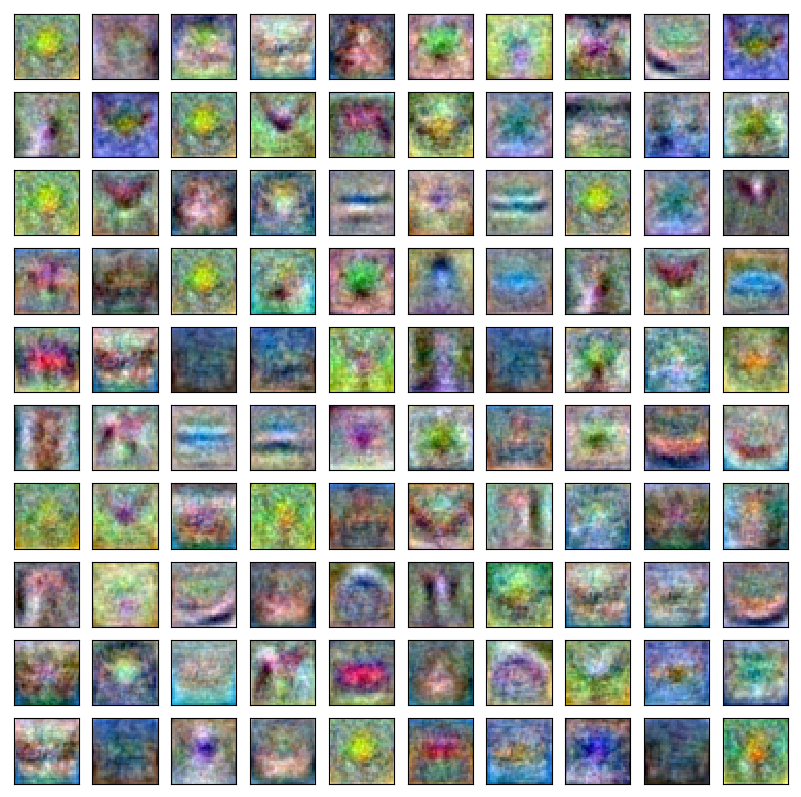

In [7]:
# Visualize the first layer filters (this tiles the first 100 filters in a 10x10 grid)
# -- a large number of duplicates are easily observed by visual inspection
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy()
print w.shape

f = vis_linear_weights(w)
f.savefig(os.path.join(expDir,'mlp-filter-01.png'), bbox_inches='tight')

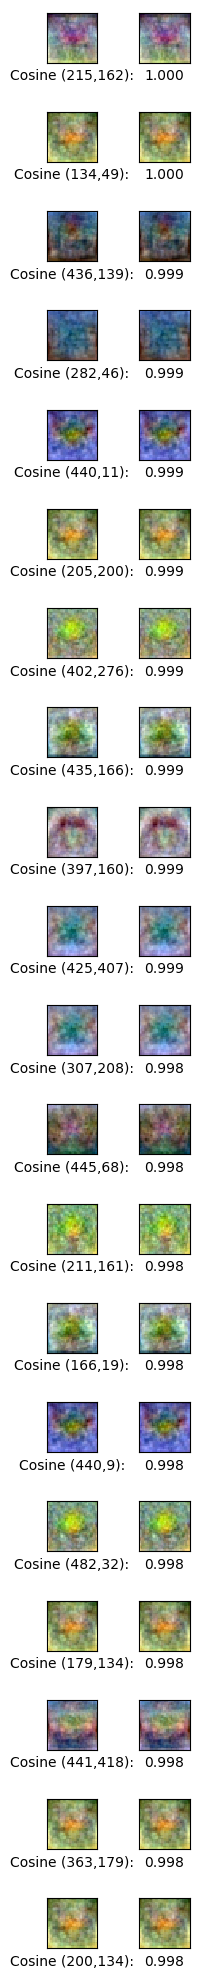

In [8]:
# Plot most similar filter PAIRS (within 95-th percentile of max cosine similarity)
MAX_PAIRS = 20
outDir = expDir # save the figure

similMat, _ = get_layer_cosine_similarity(net, 'fc1.weight')
f = vis_closest_filter_pairs(w, similMat, MAX_PAIRS)       
plt.tight_layout()
f.savefig(os.path.join(outDir,'nearest-filter-pairs.png'), bbox_inches='tight')
# plt.close(f)

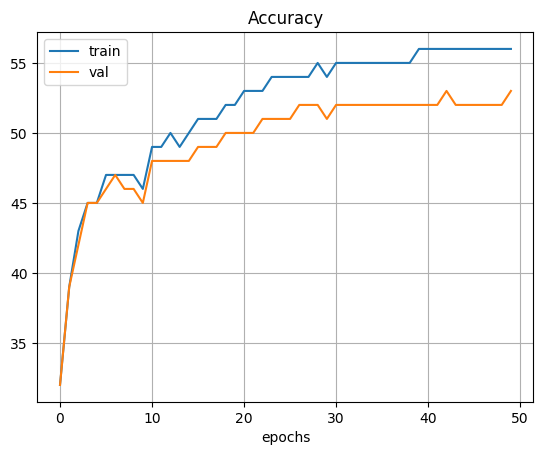

In [9]:
# Plot per-epoch peformance from log files
a = np.loadtxt(os.path.join(expDir, 'net-accu-train.log'))
b = np.loadtxt(os.path.join(expDir, 'net-accu-val.log'))
f = plot_epoch_perf(a, b)

In [11]:
# load in a pre-trained 1000-layer network
#   (usually these are trained on the Gypsum cluster and then rsynced to a local data folder)
expName = 'cifar-MLP_v6.0.6'
expDir = os.path.join('./data', expName)
net = MLP(input_dim=3072, fc1_dim=1000, fc2_dim=100)
net.load_state_dict(torch.load(os.path.join(expDir, 'net-trained.dat')))

(500, 3072)


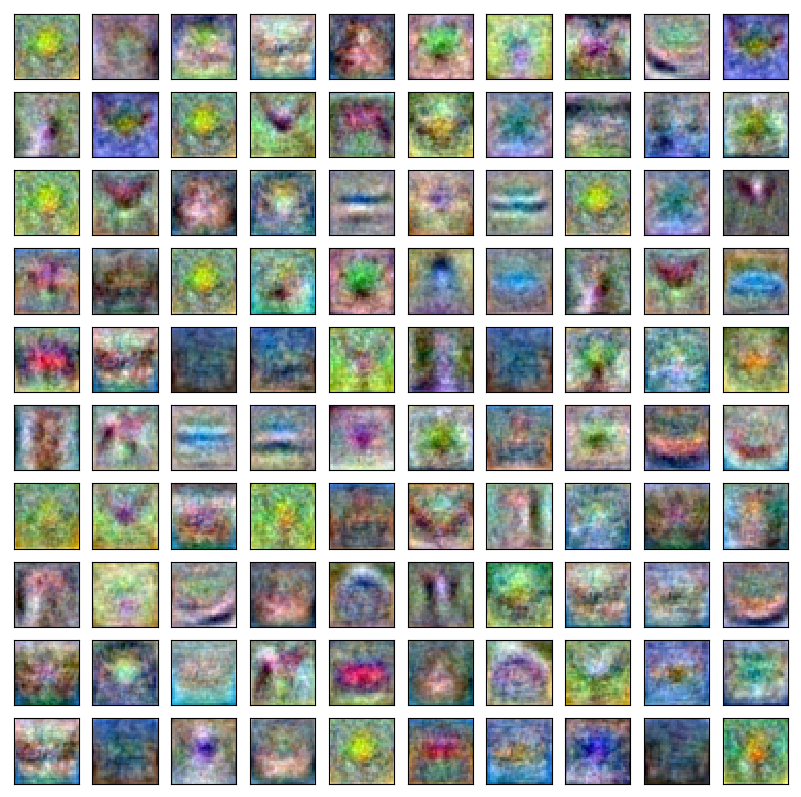

In [12]:
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy()
print w.shape

f = vis_linear_weights(w)
f.savefig(os.path.join(expDir,'mlp-filter-1k.png'), bbox_inches='tight')